In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Read main data to DataFrame
df = pd.read_stata('macoursetal_main.dta')  

In [3]:
outlier_cols=['s3ap24_htime_h_05', 'com_control_05', 'height_05',
       'weight_05', 'a10whz_05', 'pranimalprot_f_05', 'com_notvip',
       'bweight', 's3ap25_hqtime_h_05', 's1hhsz_25_64_05', 'tvip_05',
       'cons_food_pc_05', 'prfruitveg_f_05', 's3ap23_stime_h_05',
       'cons_tot_pc_05']

outlier_df = pd.DataFrame(df[outlier_cols])

## EXPLICACIÓ DE LES VARIABLES

s3ap24_htime_h_05: Temps que es triga a arribar a un hospital

com_control_05: Mitjana de controls de pes de la comunitat

height_05: Alçada

weight_05: Pes

a10whz_05: Pesos per alçada

pranimalprot_f_05: Percentatge de despeses en proteïna animal del total de consum en menjar

com_notvip: Percentatge de nanos que no han fet el test VIP

bweight: Pes al néixer

s3ap25_hqtime_h_05: Temps que es triga a arribar al "hq municipal" (descrit així, suposo que és headquarter) més proper

s1hhsz_25_64_05: Persones d'entre 25 i 64 que viuen al household

tvip_05: Score del test VIP

cons_food_pc_05: Consum de menjar anual en percentatge (?)

prfruitveg_f_05: Consum de verdures del total de menjar

s3ap23_stime_h_05: Temps que es triga a arribar a l'escola

cons_tot_pc_05: Percentatge de consum agregat (?)

In [4]:
outlier_df.describe()

#s3ap24_htime_h_05 té pocs outliers: CORRECTE
#com_control_05 té pocs outliers: CORRECTE
#height_05 distribució normal pocs outliers: CORRECTE
#weight_05 distribució normal pocs outliers: CORRECTE
#a10whz_05 distribució normal pocs outliers: CORRECTE
#pranimalprot_f_05 Una mica estrany gastar +60-80% en proteïnes d'animal... potser treure a partir de 0.6?
#com_notvip està dins el rang normal però treure el 100%
#bweight revisar amb Borrego, a priori eliminar +10 KGs
#s3ap25_hqtime_h_05 eliminar a partir de 6hrs potser. Els outliers podrien ser factibles, però
#s1hhsz_25_64_05 sembla estar dins rangs normals explicables. Jo treuria només a partir de [7] per no eliminar tantes dades
#tvip_05 No sabem com funcionen aquests tests. Jo no treuria cap outlier aquí
#cons_food_pc_05 Aquesta dada està cagada. Mínim 219%? Màxim 93108%? Aquesta variable s'ha d'eliminar
#prfruitveg_f_05 Outliers a partir de 60% més o menys.
#s3ap23_stime_h_05 eliminar a partir de 2hrs
#cons_tot_pc_05 NO ESTIC SEGUR D'AQUESTA VARIABLE crec que està cagada també

,s3ap24_htime_h_05,com_control_05,height_05,weight_05,a10whz_05,pranimalprot_f_05,com_notvip,bweight,s3ap25_hqtime_h_05,s1hhsz_25_64_05,tvip_05,cons_food_pc_05,prfruitveg_f_05,s3ap23_stime_h_05,cons_tot_pc_05
count,4465.000000,4465.000000,2458.000000,2467.000000,2419.000000,4493.000000,4465.000000,2867.000000,4465.000000,4465.000000,1103.000000,4338.000000,4493.000000,4465.000000,4465.000000
mean,1.251817,0.906121,-1.213235,-1.012455,-0.169238,0.153579,0.190114,6.792845,1.678601,1.901680,6.009973,2915.895508,0.051998,0.279763,4271.211914
std,0.969877,0.081056,1.286867,1.341470,1.100198,0.150302,0.128466,1.587113,1.174081,1.068022,5.868252,3532.596191,0.066036,0.295735,4081.238281
min,0.000000,0.500000,-5.690308,-5.692336,-5.823857,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,219.899994,0.000000,0.008333,356.100006
25%,0.500000,0.866667,-1.998605,-1.826032,-0.874560,0.040932,0.092593,6.000000,0.833333,1.000000,2.000000,1678.091309,0.007733,0.083333,2402.149902
50%,1.000000,0.918367,-1.211118,-1.040662,-0.171220,0.109484,0.176471,6.710000,1.500000,2.000000,4.000000,2331.318115,0.033020,0.166667,3418.542725
75%,2.000000,0.963964,-0.416037,-0.198399,0.520716,0.224677,0.250000,7.500000,2.000000,2.000000,7.000000,3378.000000,0.072295,0.333333,5091.190430
max,8.000000,1.000000,5.357271,5.628351,5.777898,0.971703,1.000000,21.779999,8.000000,8.000000,46.000000,93108.664062,0.980038,2.500000,94448.328125


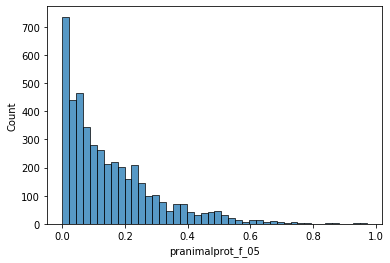

In [5]:
## pranimalprot_f_05
# Una mica estrany gastar +80% en proteïnes d'animal... potser treure a partir de 0.6?
sns.histplot(outlier_df['pranimalprot_f_05']);

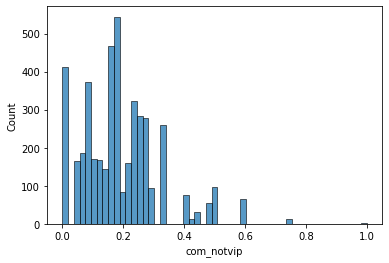

In [6]:
## com_notvip
# El 100% sembla un outlier... treure'l 
sns.histplot(outlier_df['com_notvip']);

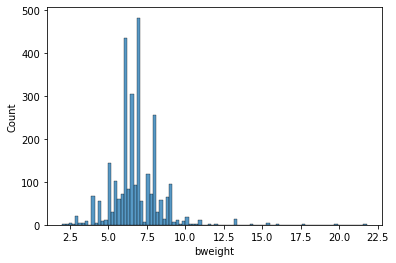

In [7]:
## bweight
# According als rangs normals (i assumint KGs), 10+ és una bogeria. Borrego que confirmi
sns.histplot(outlier_df['bweight']);

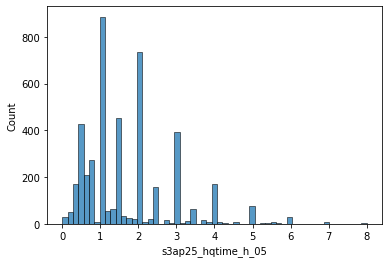

In [8]:
## s3ap25_hqtime_h_05
#Aquí només hem d'eliminar a partir de 6.
sns.histplot(outlier_df['s3ap25_hqtime_h_05']);

AxesSubplot(0.125,0.125;0.775x0.755)
2.0    2404
1.0     975
3.0     426
0.0     349
4.0     187
5.0      78
6.0      34
7.0       8
8.0       4
Name: s1hhsz_25_64_05, dtype: int64


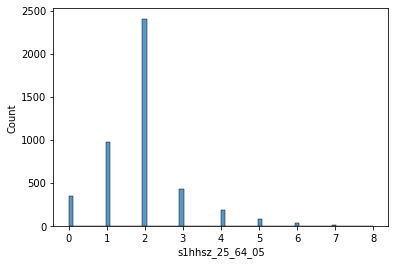

In [9]:
## s1hhsz_25_64_05
# A llatinoamèrica és més comú viure grans famílies en una mateixa casa. Poden ser rangs normals. Podríem treure a partir de [7]
print(sns.histplot(outlier_df['s1hhsz_25_64_05']))
print(outlier_df['s1hhsz_25_64_05'].value_counts())

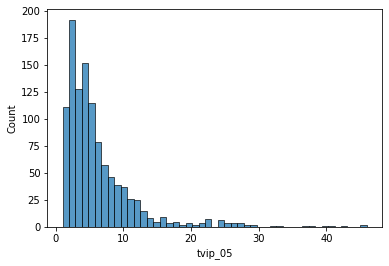

In [10]:
## tvip_05
#No sabem com funcionen els scores d'aquest test
sns.histplot(outlier_df['tvip_05']);

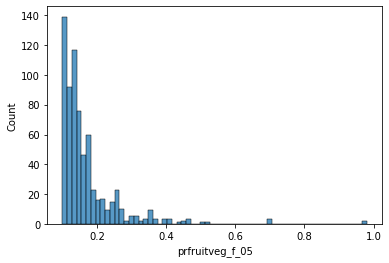

In [11]:
## prfruitveg_f_05
# Treure a partir de 60%
sns.histplot(outlier_df['prfruitveg_f_05'][outlier_df['prfruitveg_f_05'] > 0.1]);